<a href="https://colab.research.google.com/github/udaraKavishka/titanic-survival-prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 01 : Titanic Survival Prediction Model**



Github Connection


In [75]:
!git clone https://github.com/udaraKavishka/titanic-survival-prediction.git

fatal: destination path 'titanic-survival-prediction' already exists and is not an empty directory.


Import Dependencies


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Data Collection and Processing

In [77]:

titanic_data= pd.read_csv('/content/titanic-survival-prediction/Titanic-Dataset.csv')

In [78]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [79]:

titanic_data.shape

(891, 12)

In [80]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:

titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values are found

Handling Missing Values Handling


In [83]:
titanic_data=titanic_data.drop(columns='Cabin',axis=0)

In [84]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [85]:
print(titanic_data['Embarked'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB
None


In [86]:
print (titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [87]:
print (titanic_data['Embarked'].mode()[0])

S


In [88]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [89]:
titanic_data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [90]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


All Missing Values has been removed

In [91]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [119]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

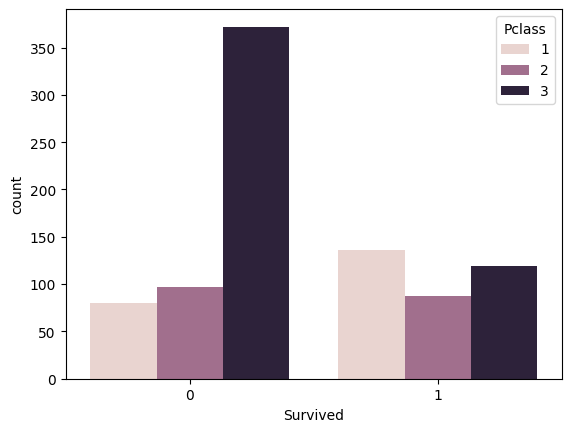

In [92]:
sns.countplot(x=titanic_data['Survived'],hue=titanic_data['Pclass'])

Conclusion : class Passengers have not been survived the most

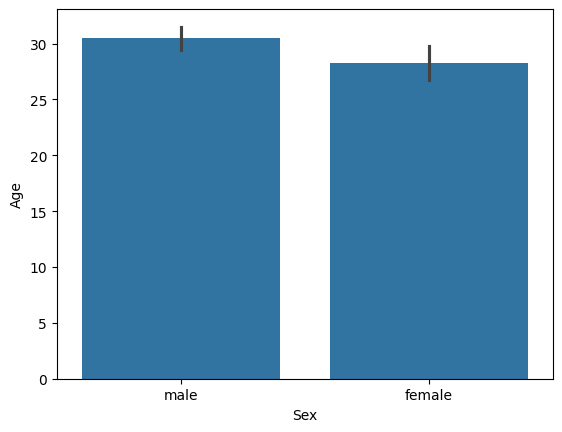

In [93]:
#bar plot
res= sns.barplot(x='Sex',y='Age', data=titanic_data)
plt.show()


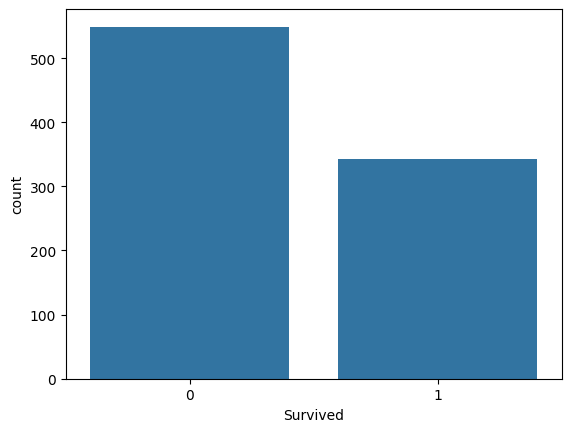

In [94]:
#countplot
sns.countplot(x='Survived', data=titanic_data)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

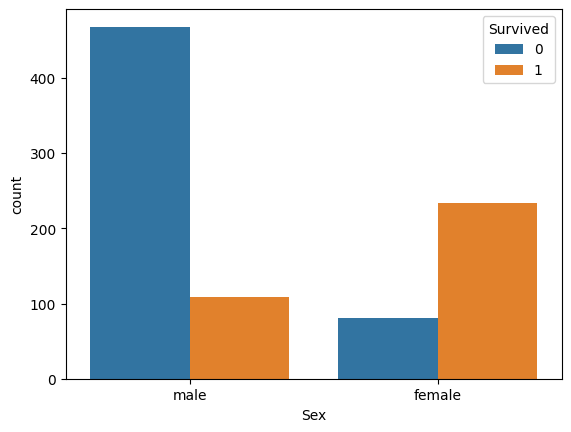

In [95]:
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

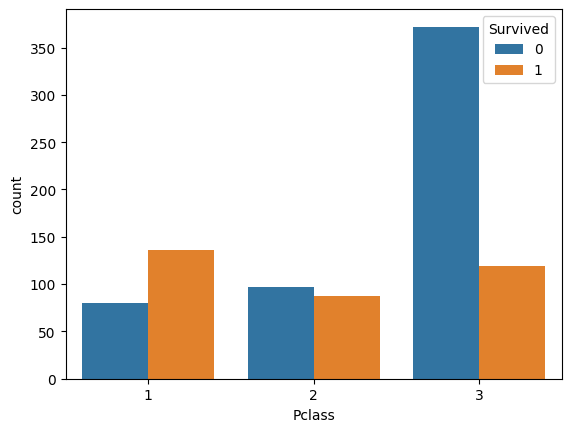

In [96]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

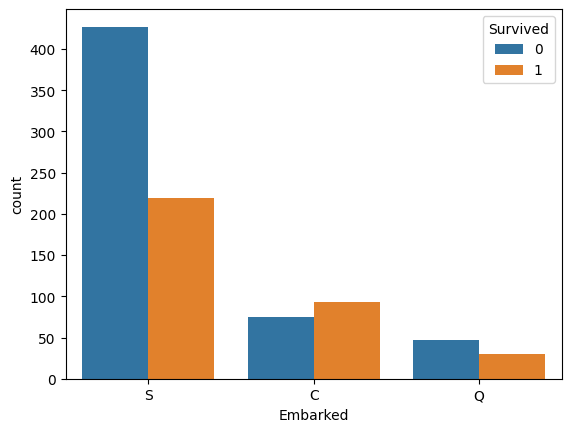

In [97]:
sns.countplot(x='Embarked',hue='Survived',data=titanic_data)

In [98]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [99]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Conversion of Categorical data into Numerical data


> Males - 0

> Females - 1






In [100]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0, 'C':1,'Q':2}}, inplace=True)

In [101]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


<Axes: xlabel='Sex', ylabel='count'>

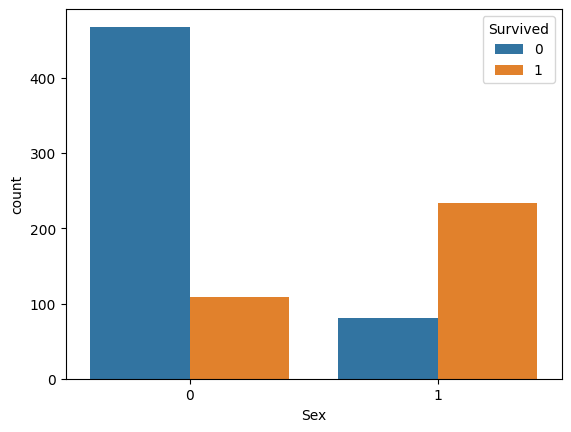

In [102]:
sns.countplot(x=titanic_data['Sex'],hue=titanic_data['Survived'])

In [103]:
X= titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y= titanic_data['Survived']

In [104]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [105]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting data into training data and test data


In [106]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

Model Training

In [116]:
model=LogisticRegression(max_iter=1000)

In [115]:
X.shape
X_train.shape

(712, 7)

In [117]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [118]:
X_train_prediction= model.predict(X_train)
print(X_train_prediction)

[1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1
 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 

In [123]:
train_data_accuracy= accuracy_score(Y_train,X_train_prediction)
print(train_data_accuracy)

0.8033707865168539


In [109]:
X_test_prediction= model.predict(X_test)
print(X_test_prediction)

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [110]:
print(Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [124]:
test_data_accuracy= accuracy_score(Y_test,X_test_prediction)
print(test_data_accuracy)

0.8044692737430168


Enter Your Data Set :

> Pclass (Passenger Class) - 1st / 2nd/ 3rd

> Sex -

*   Male(0)
*   FeMale(0)

> Age

>  SibSp - # of siblings / spouses aboard the Titanic

> Parch - # of parents / children aboard the Titanic

> Fare - Passenger fare

> Embarked - Port of Embarkation

*  0 = Cherbourg
*  1 = Queenstown,
*  2 = Southampton





















In [136]:
new_data=pd.DataFrame({
    'Pclass' :[1],
    'Sex' : [0],
    'Age' : [20],
    'SibSp' : [0],
    'Parch' :[0],
    'Fare' :[7.9],
    'Embarked' :[0]
})

prediction=model.predict(new_data)
prediction[0]
if(prediction[0] == 0):
  print("Not Survived")
else:
  print("Survived")


Survived
